In [1]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from collections import Counter

In [2]:
corpuspath = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\unclean_text_data_test\\'
corpus = PlaintextCorpusReader(corpuspath, '.*')

In [3]:
len(corpus.words())
corpus.fileids()

['5ZXOjh7b8b.051154254863466364.txt',
 '5ZXOjh7b8b.2600031969558446.txt',
 '62169873.9745533297000392.txt',
 '62195691.16437752848229537.txt',
 '62202318.3073866896543671.txt',
 '62202367.7023064602847127.txt',
 '62205961.6667602177826962.txt',
 '62207492.8958897353426724.txt',
 '62211362.04299373174225851.txt',
 '9H9rZwcTHA.6731480092910042.txt',
 'AQ38T6Wc8S.4564175745396877.txt',
 'PX03ihgCmY.2702831120492002.txt',
 'SfpirDTyQX.6894658617056856.txt',
 'TEc02CDYWj.16340954010308395.txt',
 'p0cmnhz9.0029124590923015337.txt',
 'p8Ndnc14Ag.9144407147096637.txt',
 'wktTh0nYXM.6218168798805613.txt',
 'xVxFBketmg.07293471805575047.txt',
 'xVxFBketmg.5472957698674084.txt']

In [4]:
# corpus()

In [5]:
no_of_files = len(corpus.fileids())
print('Total News Items : ', no_of_files)
# Number of words
total_words = len(corpus.words())
print('Total Words : ', total_words)
unique_words=len(set(corpus.words()))
print('Unique Words : ', unique_words)
number_of_sents=len(corpus.sents())
print('Number of Setences : ', number_of_sents)

Total News Items :  19
Total Words :  17703
Unique Words :  3202
Number of Setences :  754


In [6]:
# for fileid in corpus.fileids():
#     print(corpus.raw(fileid))
#     print('________')

In [7]:
bag_of_words = set(corpus.words())


In [8]:
import re
def normalize_corpus(corpus_passed):
    
    normalized_corpus = []    
    for fileid in corpus_passed.fileids():
        text = corpus_passed.raw(fileid)
        tokenize_text = corpus_passed.words(fileid)
        filtered_tokens = []
        for token in tokenize_text:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)
        filtered_text = ' '.join(filtered_tokens)
        #text_pattern = r'[a-zA-Z]'
        #cleantext2 = re.sub(r'[a-zA-Z]', '', text)
        
        #print(cleantext2)
        normalized_corpus.append(filtered_text)
        #print('__________________________________________')
    return normalized_corpus

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# We improve our feature matrix builder with 3 additional optional parameters
# This allows us to extract not only word features, but also n-gram features
# We can also set the minimum and maximum frequencies to be considered as valid
# NB: All these are simply passed on to sklearn's Vectorizer classes
def build_feature_matrix(documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

In [10]:
normalized_corpus = normalize_corpus(corpus)

In [11]:
len(normalized_corpus)

19

In [12]:
# from sklearn.model_selection import train_test_split

In [46]:
normalized_corpus = normalize_corpus(corpus)

# Extract (tf-idf) features using out utils library
vectorizer, feature_matrix = build_feature_matrix(normalized_corpus,
                                                  feature_type='tfidf',
                                                  #min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))
# How many features do we have?
print(feature_matrix.shape)     

# Get the names of the features
feature_names = vectorizer.get_feature_names()

# Show the first twenty features (check more if needed)
print(feature_names[:50])

(19, 3009)
['100m', '10th', '11th', '12b', '12th', '137km', '147break', '14th', '150th', '155th', '15th', '16th', '18th', '1990s', '1h', '1k', '1m', '1st', '200m', '28k', '3200s', '38m', '3m', '3rd', '400m', '49m', '4x100m', '4x400m', '5k', '5m', '7h', '9h', 'abby', 'ability', 'able', 'abroad', 'absence', 'absolute', 'absolutely', 'academy', 'accept', 'accepted', 'access', 'accessibility', 'accident', 'accommodate', 'account', 'accountants', 'accurate', 'achieve']


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
params = vectorizer.get_params()

In [41]:
# params

In [16]:
from sklearn.cluster import KMeans

# Define the k-means clustering function which will call sklearn's KMeans function
# with our parameters
def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [18]:
print(type(feature_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [19]:
num_clusters = 5
# Call the above function to get clusters and assign the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix=feature_matrix,
                           num_clusters=num_clusters)
# movie_data['Cluster'] = clusters

In [22]:
strtst = '''The 24-year-old won two Dutch titles in three years under Erik ten Hag with Ajax, is their current player of the year and follows the manager to Old Trafford.

Despite standing 5ft 9in, he won more aerial duels in the league than Harry Maguire last season and won the ball more times than any United defender.

Want to know more about Martinez? Read on.'''

In [26]:
import nltk
def tokenize_text(text):
    sentences = nltk.word_tokenize(text)
    #word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences] 
    return sentences

tokenized = tokenize_text(strtst)

In [42]:
filtered_text = []
for token in tokenized:
    
    if re.search('[a-zA-Z]', token):
        filtered_text.append(token)
#filtered_text

In [56]:
feature_matrix

<19x3009 sparse matrix of type '<class 'numpy.float64'>'
	with 7004 stored elements in Compressed Sparse Row format>

In [54]:
vectorizer2, feature_matrix2 = build_feature_matrix(filtered_text,
                                                  feature_type='tfidf',
                                                  #min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))

In [55]:
feature_matrix2

<64x52 sparse matrix of type '<class 'numpy.float64'>'
	with 66 stored elements in Compressed Sparse Row format>

In [57]:
print(km_obj.predict(feature_matrix2))

ValueError: X has 52 features, but KMeans is expecting 3009 features as input.

In [25]:
# Plotting the distortions of K-Means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

distortions = []
K = range(,10)
# Running K-Means with a range of k
for k in K: 
    km_obj, clusters = k_means(feature_matrix=feature_matrix,
                           num_clusters=k)
    # inertia_ is the distance from each sample to the centroid.
    distortions.append(km_obj.inertia_)

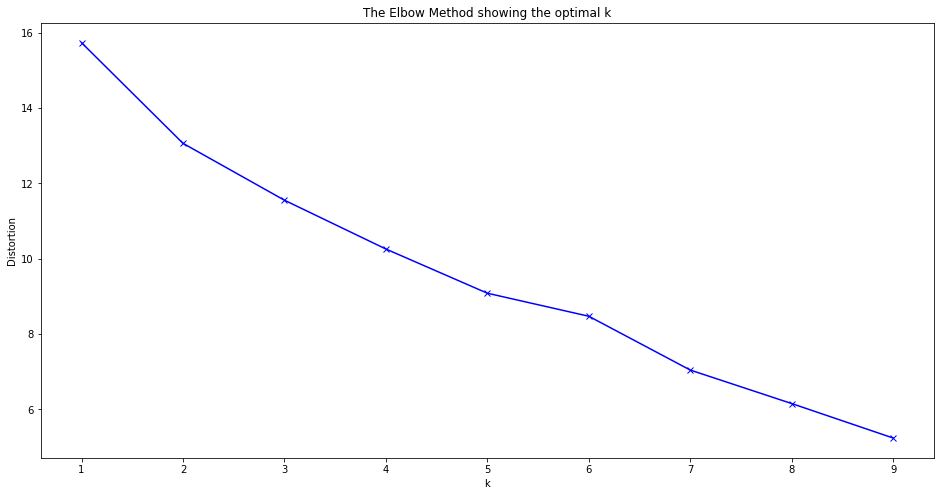

In [26]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
km_obj

NameError: name 'km_obj' is not defined